<a href="https://colab.research.google.com/github/JoaoVLima/ChatGuarani/blob/main/ChatGuarani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

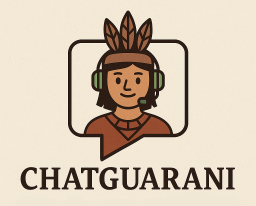

# **ChatGuarani**
###### **O chatbot feito pra responder todas as suas perguntas sobre "O Guarani: romance brazileiro de José Martiniano de Alencar".**
###### *feito por [João Lima](https://github.com/JoaoVLima)*
---

> Para executar o projeto:
```
Ctrl + F9
```

###### O codigo vai abrir um popup para sua interação com o Chat, caso queira interagir com o Google Colab, vá até a sessão ***Interface***

# Código

In [7]:
# Baixando uma pipeline em portugues (small)
!python -m spacy download pt_core_news_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/pt_core_news_sm-3.8.0/pt_core_news_sm-3.8.0-py3-none-any.whl (13.0 MB)
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
# Baixando o livro
!wget -nc https://raw.githubusercontent.com/JoaoVLima/ChatGuarani/refs/heads/main/o_guarani.txt

File ‘o_guarani.txt’ already there; not retrieving.



In [37]:
# como foi que pery morreu?
# Pery não morre diretamente por um ataque dos aimorés ou por uma batalha. Ele é morto por uma tempestade em alto mar, enquanto viaja com Cecília.

# como foi que pery morreu?
# Pery hallucinado suspendeu-se aos cipós que se entrelaçavão pelos
# ramos das arvores já cobertas d'agua, e com esforço desesperado
# cingindo o tronco da palmeira nos seus braços hirtos, abalou-o até ás
# raizes.
# Tres vezes os seus musculos de aço, estorcendo-se, inclinárão a haste
# robusta; e tres vezes o seu corpo vergou, cedendo á retracção
# violenta da arvore, que voltava ao lugar que a natureza lhe havia
# marcado.
# Luta terrivel, espantosa, louca, esvairada, luta da vida contra a
# materia; luta do homem contra a terra; luta da força contra a
# immobilidade.
# Houve um momento de repouso em que o homem, concentrando todo o seu
# poder, estorceu-se de novo contra a arvore; o impeto foi terrivel; e
# pareceu que o corpo ia despedaçar-se nessa distensão horrivel.
# Ambos, arvore e homem, embalançáráo-se no seio das aguas: a haste
# oscillou; as raizes desprendêrão-se da terra já minada profundamente
# pela torrente.
# A cupola da palmeira, embalançando-se graciosamente, resvalou pela
# flôr d'agua como um ninho de garças ou alguma ilha fluctuante, formada
# pelas vegetações aquaticas.
# Pery estava de novo sentado junto de sua senhora quasi inanimada; e,
# tomando-a nos braços, disse-lhe com um accento de ventura suprema:
# --Tu viverás!
# Cecilia abrio os olhos, e vendo seu amigo junto della, ouvindo ainda
# suas palavras, sentio o enlevo que deve ser o gozo da vida eterna.
# --Sim?... murmurou ella; viveremos!... lá no céo, no seio de Deos,
# junto daquelles que amamos!...
# O anjo espanejava-se para remontarão berço.
# --Sobre aquelle azul que tu vês, continuou ella, Deos mora no seu
# throno, rodeado dos que o adorão. Nós iremos lá, Pery! Tu viverás
# com tua irmã, sempre!..
# Ella embebeu os olhos nos olhos do seu amigo, e languida reclinou a
# loura fronte.
# O halito ardente de Pery bafejou-lhe a face.
# Fez-se no semblante da virgem um ninho de castos rubores e limpidos
# sorrisos: os labios abrirão como as azas purpureas de um beijo soltando
# o vôo.
# A palmeira arrastada pela torrente impetuosa fugia...
# E sumio-se no horizonte.

In [58]:
# teste ruim usando o proprio spacy

nlp = spacy.load("pt_core_news_sm")

dicionario = {}

# Processar a consulta
doc_consulta = nlp("quem matou o pery?")

# Calcular similaridade com cada documento
for i, frase in enumerate(sentences):
    doc = nlp(frase)
    similaridade = doc_consulta.similarity(doc)
    dicionario[similaridade] = i
    if i == 3000:
        break

print(sentences[dicionario[max(dicionario.keys())]])

<ipython-input-58-fa2ddeaba9ec>:13: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similaridade = doc_consulta.similarity(doc)


quem sabe se houve alguma cousa!


In [59]:
# bibliotecas
import re
from collections import OrderedDict

def process_text(filename):
    # lendo o arquivo de texto
    text = open(filename, 'r').read()

    # removendo espaços e quebras de linha
    text = text.split()
    text = " ".join(text)

    # convertendo para lowerCase
    text = text.lower()

    # conjunto de caracteres para marcar fim de sentença
    sentence_endings = ['.', ';', '!', '?']

    # divisão do texto em sentenças
    sentences = []
    current_sentence = ""

    for char in text:
        current_sentence += char

        # fim de sentença?
        if char in sentence_endings:
            # coloca a sentença na lista
            sentences.append(current_sentence.strip())
            current_sentence = ""

    # última sentença caso não termine com uma das pontuações escolhidas
    if current_sentence.strip():
        sentences.append(current_sentence.strip())

    # criando o vocabulário na ordem em que as palavras aparecem
    vocabulary = OrderedDict()

    for sentence in sentences:
        # divide em tokes e remove toda pontuação e números
        words = re.findall(r'\b[a-z]+\b', sentence)

        # adiciona ao vocabulário
        for word in words:
            if word not in vocabulary:
                vocabulary[word] = True

    # converte em lista
    vocabulary_list = list(vocabulary.keys())

    return sentences, vocabulary_list

# executa as funções
sentences, vocabulary = process_text('o_guarani.txt')

# Só para Debug
print(f"Número de sentenças: {len(sentences)}")
print(f"Cardinalidade do Vocabulário: {len(vocabulary)}")

print("\n Amostra de sentenças:")
for i in range(min(15, len(sentences))):
    print(f"{i+1}. {sentences[i]}")

print("\n Amostra do vocabulário:")
for i in range(min(20, len(vocabulary))):
    print(f"{i+1}. {vocabulary[i]}")

Número de sentenças: 12168
Cardinalidade do Vocabulário: 9776

 Amostra de sentenças:
1. j.
2. de alencar o guarany romance brazileiro quinta edição tomo primeiro rio de janeiro b.
3. -l.
4. garnier, livreiro-editor 71, rua do ouvidor, 71 paris.
5. --e.
6. mellier, 17, rua séguier.
7. ficão reservados os direitos de propriedade.
8. 1883 ao leitor publicando este livro em 1857, se disse ser aquella primeira edição uma prova typographica, que algum dia talvez o autor se dispuzesse a rever.
9. esta nova edição devia dar satisfação do empenho, que a extrema benevolencia do publico ledor, tão minguado ainda, mudou em bem para divida de reconhecimento.
10. mais do que podia fiou de si o autor.
11. relendo a obra depois de annos, achou elle tão mau e incorrecto quando escrevera, que para bem corrigir, fora mister escrever de novo.
12. para tanto lhe carece o tempo e sobra o tedio de um labor ingrato.
13. cingio-se pois ás pequenas emendas que toleravão o plano da obra e o desalinho de um esty

In [11]:
import numpy as np
import pandas as pd
import re
import time
import psutil
import os
from scipy.sparse import csr_matrix
from collections import OrderedDict

def memory_usage():
    """Retorna o uso de memória em MB"""
    process = psutil.Process(os.getpid())
    mem = process.memory_info().rss / (1024 * 1024)  # Converte bytes para MB
    return mem

def create_term_document_matrix_scipy(sentences, vocabulary):
    # Registra tempo e memória
    start_time = time.time()
    start_memory = memory_usage()

    print(f"Uso inicial de memória: {start_memory:.2f} MB")

    # número de sentenças e tamanho do vocabulário
    num_sentences = len(sentences)
    num_terms = len(vocabulary)

    print(f"Matriz: {num_sentences} sentenças × {num_terms} termos")
    print(f"Total de células: {num_sentences * num_terms:,}")

    # Cria um dicionário para busca rápida de termos (palavra -> índice)
    term_to_index = {term: idx for idx, term in enumerate(vocabulary)}

    # memória após criar term_to_index
    checkpoint_1_memory = memory_usage()
    print(f"Memória após criar índice de termos: {checkpoint_1_memory:.2f} MB")
    print(f"Variação de memória: {checkpoint_1_memory - start_memory:.2f} MB")

    # Inicializa listas para construção da matriz esparsa
    print("Inicializando estruturas para matriz esparsa...")
    init_time = time.time()
    row_indices = []
    col_indices = []
    data_values = []
    init_end_time = time.time()

    # Checkpoint de memória após inicialização
    checkpoint_2_memory = memory_usage()
    print(f"Memória após inicialização de estruturas: {checkpoint_2_memory:.2f} MB")
    print(f"variação de  memória para inicialização: {checkpoint_2_memory - checkpoint_1_memory:.2f} MB")
    print(f"Tempo para inicializar estruturas: {init_end_time - init_time:.2f} segundos")

    # Processa cada sentença
    print("Preenchendo matriz com FT...")
    fill_start_time = time.time()

    for sent_idx, sentence in enumerate(sentences):
        # Indicador de progresso a cada 1000 sentenças
        if sent_idx % 1000 == 0 and sent_idx > 0:
            print(f"Processadas {sent_idx} sentenças...")
            current_memory = memory_usage()
            print(f"Uso atual de memória: {current_memory:.2f} MB")

        # Extrai palavras da sentença
        words = re.findall(r'\b[a-z]+\b', sentence)

        # Conta frequências de palavras nesta sentença
        word_freq = {}
        for word in words:
            if word in vocabulary:  # Garante que a palavra está no vocabulário
                word_freq[word] = word_freq.get(word, 0) + 1

        # Adiciona entradas às nossas listas de construção de matriz esparsa
        for word, freq in word_freq.items():
            row_indices.append(sent_idx)
            col_indices.append(term_to_index[word])
            data_values.append(freq)

    fill_end_time = time.time()
    print(f"Tempo para preencher estruturas: {fill_end_time - fill_start_time:.2f} segundos")

    # Checkpoint de memória após preencher estruturas
    checkpoint_3_memory = memory_usage()
    print(f"Memória após preencher estruturas: {checkpoint_3_memory:.2f} MB")
    print(f"Variação de memória para preenchimento: {checkpoint_3_memory - checkpoint_2_memory:.2f} MB")

    # Cria matriz esparsa
    print("Criando matriz esparsa CSR...")
    csr_start_time = time.time()
    tf_matrix_sparse = csr_matrix((data_values, (row_indices, col_indices)),
                               shape=(num_sentences, num_terms))
    csr_end_time = time.time()

    # Checkpoint de memória após criação da matriz CSR
    checkpoint_4_memory = memory_usage()
    print(f"Memória após criação da matriz CSR: {checkpoint_4_memory:.2f} MB")
    print(f"Variação de memória para matriz CSR: {checkpoint_4_memory - checkpoint_3_memory:.2f} MB")
    print(f"Tempo para criar matriz CSR: {csr_end_time - csr_start_time:.2f} segundos")

    # Cria um DataFrame para melhor visualização (apenas para uma pequena amostra)
    print("Criando DataFrame pandas para visualização (apenas amostra)...")
    if num_sentences > 1000 or num_terms > 1000:
        # Se a matriz for grande, converte apenas uma pequena amostra para DataFrame
        sample_rows = min(1000, num_sentences)
        sample_cols = min(1000, num_terms)
        # Converte a submatriz para array denso
        sample_dense = tf_matrix_sparse[:sample_rows, :sample_cols].toarray()
        tf_df = pd.DataFrame(
            sample_dense,
            columns=vocabulary[:sample_cols]
        )
        print("DataFrame criado com amostra da matriz")
    else:
        tf_df = pd.DataFrame(tf_matrix_sparse.toarray(), columns=vocabulary)

    # Medições finais de memória e tempo
    end_memory = memory_usage()
    end_time = time.time()

    print(f"\n--- Estatísticas ---")
    print(f"Tempo total de execução: {end_time - start_time:.2f} segundos")
    print(f"Uso final de memória: {end_memory:.2f} MB")
    print(f"Variação total de memória: {end_memory - start_memory:.2f} MB")

    # Calcula esparsidade nnz=number of non-zeros
    non_zero_entries = tf_matrix_sparse.nnz
    total_entries = num_sentences * num_terms
    sparsity = (non_zero_entries / total_entries) * 100
    print(f"Esparsidade da matriz: {sparsity:.4f}% elementos não-zero")
    print(f"Número de entradas não-zero: {non_zero_entries:,} de {total_entries:,}")

    # vamos chutar na outra direção, a matriz densa
    estimated_dense_memory = (num_sentences * num_terms * 4) / (1024 * 1024)  # 4 bytes por float32
    print(f"Memória estimada com matriz densa: {estimated_dense_memory:.2f} MB")
    print(f"Variação de memória com matriz esparsa: {estimated_dense_memory - (end_memory - start_memory):.2f} MB")

    return tf_df, tf_matrix_sparse

# Executa a função para criar a matriz termo-documento com medições de desempenho
print("Criando matriz termo-documento usando SciPy...")
tf_df, tf_matrix_sparse = create_term_document_matrix_scipy(sentences, vocabulary)

# Exibe uma amostra da matriz (5 linhas, 10 colunas)
print("\nAmostra da matriz termo-documento:")
sample_df = tf_df.iloc[:5, :10]
print(sample_df)

# Demonstração simples de operações com matriz esparsa
print("\nDemonstrando operações com matriz esparsa:")
operation_start_time = time.time()

# Calcula soma de frequências de termos para cada sentença
sentence_sums_start = time.time()
sentence_sums = tf_matrix_sparse.sum(axis=1).A1  # .A1 converte matriz para array 1D
print(f"Tempo para somas por sentença: {time.time() - sentence_sums_start:.4f} segundos")

# Calcula frequência de termos em todos os documentos
term_frequency_start = time.time()
term_sums = tf_matrix_sparse.sum(axis=0).A1
print(f"Tempo para somas por termo: {time.time() - term_frequency_start:.4f} segundos")

# Encontra o termo mais comum
most_common_term = np.argmax(term_sums)
most_common_term_name = vocabulary[most_common_term]
print(f"Termo mais comum: '{most_common_term_name}' com frequência {term_sums[most_common_term]}")

print("\nTempo total para operações com matriz esparsa: {:.4f} segundos".format(
    time.time() - operation_start_time))

Criando matriz termo-documento usando SciPy...
Uso inicial de memória: 789.20 MB
Matriz: 12168 sentenças × 9776 termos
Total de células: 118,954,368
Memória após criar índice de termos: 789.20 MB
Variação de memória: 0.00 MB
Inicializando estruturas para matriz esparsa...
Memória após inicialização de estruturas: 789.20 MB
variação de  memória para inicialização: 0.00 MB
Tempo para inicializar estruturas: 0.00 segundos
Preenchendo matriz com FT...
Processadas 1000 sentenças...
Uso atual de memória: 789.20 MB
Processadas 2000 sentenças...
Uso atual de memória: 789.20 MB
Processadas 3000 sentenças...
Uso atual de memória: 789.20 MB
Processadas 4000 sentenças...
Uso atual de memória: 789.20 MB
Processadas 5000 sentenças...
Uso atual de memória: 789.20 MB
Processadas 6000 sentenças...
Uso atual de memória: 789.20 MB
Processadas 7000 sentenças...
Uso atual de memória: 789.20 MB
Processadas 8000 sentenças...
Uso atual de memória: 789.20 MB
Processadas 9000 sentenças...
Uso atual de memória: 

In [69]:
question = ['Quem matou o pery?']
question_tf_df, question_tf_matrix_sparse = create_term_document_matrix_scipy(question, vocabulary)

Uso inicial de memória: 1074.16 MB
Matriz: 1 sentenças × 9776 termos
Total de células: 9,776
Memória após criar índice de termos: 1074.16 MB
Variação de memória: 0.00 MB
Inicializando estruturas para matriz esparsa...
Memória após inicialização de estruturas: 1074.16 MB
variação de  memória para inicialização: 0.00 MB
Tempo para inicializar estruturas: 0.00 segundos
Preenchendo matriz com FT...
Tempo para preencher estruturas: 0.00 segundos
Memória após preencher estruturas: 1074.16 MB
Variação de memória para preenchimento: 0.00 MB
Criando matriz esparsa CSR...
Memória após criação da matriz CSR: 1074.16 MB
Variação de memória para matriz CSR: 0.00 MB
Tempo para criar matriz CSR: 0.00 segundos
Criando DataFrame pandas para visualização (apenas amostra)...
DataFrame criado com amostra da matriz

--- Estatísticas ---
Tempo total de execução: 0.01 segundos
Uso final de memória: 1074.16 MB
Variação total de memória: 0.00 MB
Esparsidade da matriz: 0.0307% elementos não-zero
Número de entra

In [70]:
from sklearn.metrics.pairwise import cosine_similarity
similaridades = cosine_similarity(question_tf_matrix_sparse, tf_matrix_sparse)

In [71]:
# Resultados em DataFrame
df_resultado = pd.DataFrame({
    "documento": sentences,
    "similaridade": similaridades[0]
}).sort_values(by="similaridade", ascending=False)

In [77]:
df_resultado

,documento,similaridade
12022,pery!,0.57735
8566,--pery?,0.57735
9175,pery não teme o inimigo;,0.57735
8335,--pery!,0.57735
6502,--=o cão=.,0.57735
...,...,...
6176,--é impossivel!,0.00000
6173,exclamou alvaro.,0.00000
6172,.,0.00000
6208,que salves a senhora!,0.00000


In [82]:
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display

# Carregar modelo spaCy para português
nlp = spacy.load("pt_core_news_sm")

# ========================
# ETAPA 1 - PROCESSAMENTO
# ========================

# Carregar texto do livro
with open("o_guarani.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

# Pré-processamento (limpeza e tokenização)
def preprocess(text):
    doc = nlp(text)
    return [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]

# Segmentação em chunks
def chunk_text(text, chunk_size=200, overlap=0.5):
    words = preprocess(text)
    step = int(chunk_size * (1 - overlap))
    chunks = [' '.join(words[i:i+chunk_size]) for i in range(0, len(words), step)]
    return chunks

chunks = chunk_text(raw_text)

# ===========================
# ETAPA 2 - ARMAZENAMENTO
# ===========================

# Gerar embeddings médios para cada chunk
def get_chunk_vector(chunk):
    doc = nlp(chunk)
    return doc.vector

chunk_vectors = np.array([get_chunk_vector(chunk) for chunk in chunks])

# ===============================
# ETAPA 3 - CONSULTA E INTERFACE
# ===============================

def responder_pergunta(pergunta):
    doc_pergunta = nlp(pergunta)
    pergunta_vector = doc_pergunta.vector.reshape(1, -1)

    # Similaridade com todos os chunks
    sims = cosine_similarity(pergunta_vector, chunk_vectors)[0]
    idx_mais_similar = np.argmax(sims)
    similaridade = sims[idx_mais_similar]

    resposta = chunks[idx_mais_similar]

    resposta += f".\nEu tenho {(similaridade*100):.2f}% de certeza disso."

    return resposta

# Interface com IPyWidgets
input_box = widgets.Text(
    placeholder='Digite sua pergunta sobre "O Guarani"',
    description='Pergunta:',
    layout=widgets.Layout(width='100%')
)

output_box = widgets.Output()

def on_submit(change):
    pergunta = change['new']
    resposta = responder_pergunta(pergunta)
    output_box.clear_output()
    with output_box:
        print(f"Resposta: {resposta}")

input_box.observe(on_submit, names='value')

display(input_box, output_box)

Text(value='', description='Pergunta:', layout=Layout(width='100%'), placeholder='Digite sua pergunta sobre "O…

Output()

ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required by check_pairwise_arrays.

# Interface

In [19]:
#@title **Interface GoogleColab ChatGuarani**
# @markdown Digite aqui a sua pergunta:
pergunta = "Quem matou Peri?" # @param {"type":"string","placeholder":"sadasd"}
# @markdown ---
# @markdown > Para executar a pergunta:
# @markdown ```
# @markdown Ctrl + Enter
# @markdown ```
resposta = f"vai toma no cu {pergunta}"
print(resposta)



vai toma no cu Quem matou Peri?


In [20]:
#@title **Interface Popup ChatGuarani**
from IPython.core.display import HTML
HTML("""
<script>
    var mensagem = prompt("Pergunta: ");
    var resposta = "Execute o projeto com Crtl+F9";
    alert("Chatbot: " + resposta);
</script>
""")